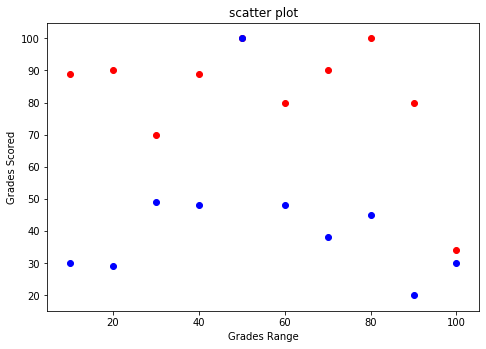

In [1]:
import matplotlib.pyplot as plt

girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]

grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(grades_range, girls_grades, color='r')
ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()

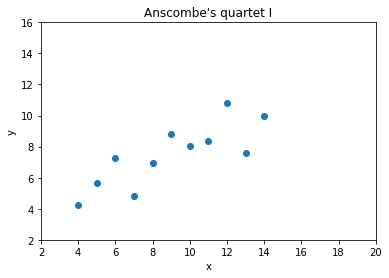

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

plt.scatter(x, y)
plt.xlim((2, 20))
plt.ylim((2, 16))
plt.title('Anscombe\'s quartet I')
plt.xlabel('x')
plt.ylabel('y')
plt.show()